# 09-Web scraping

This notebook gives an introduction to web scraping in Python using `pandas`.

Web sites often contain large amounts of data.

Many web sites have developed *APIs* in order to grant people access to their data. To use an API, we make a request to their web server and if the request is approved, the API returns the requested data. 

All APIs are different, and in order to know how to use a web site's API, we must read their API documentation (or find an online tutorial!). In addition, you need to use a Python library to create API requests.  

(The most popular package in Python for extracting data from APIs is `requests`. See [this](https://realpython.com/python-requests/) web page for a tutorial of the `requests` package, and see [this](https://medium.com/codex/alpha-vantage-an-introduction-to-a-highly-efficient-free-stock-api-6d17f4481bf) web page for a tutorial on how to use `requests` to extract stock data from the Alpha Vantage API.)

However, a lot of data online is not available through an API. In which case, if we want to extract the data, we must do so through *web scraping*. In web scraping, we write programs that extracts information directly from the web site. 

Unfortunately, there is no ONE way of doing web scraping. What type of information we can extract from a web site and how to extract it varies from web site to web site. In fact many web sites do not want people to scrape their content, and therefore makes it difficult (in some cases, it might even be illegal to scrape the content from their web sites). 

We will look at two different ways that we can use `pandas` to scrape content off the web:
- Import data from URLs
- Read HTML tables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## Import data from URLs

We have seen how to use `read_csv` to import CSV files. However, notice that `read_csv` can also import CSV files directly from an URL (see the [function documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).

**Example: titanic data**

We have used the `titanic` data throughout this course. This is a common data set to work on when learning how to do data science in Python and R. I have downloaded the data set from [this](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) user on github.

Instead of downloading the data file to our computer and then import it using `pandas`, we can import the file directly into our Python program by using the URL. 

Let us store the URL in a variable.

In [3]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

print(url)

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


We then pass the URL directly to `read_csv`. 

In [4]:
titanic = pd.read_csv(url)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Notice that the `titanic` data is a static data set (i.e. it is not likely to change over time). That means that we only need to download it once to our computer. The benefit of importing the data directly from the URL, as opposed to downloading it to our computer first, is therefore small.

However, when the data set is dynamic (i.e. more information is being added over time), there can be large gains from importing the data through the URL.

**Example: covid deaths**

The Center for Systems Science and Engineering at Johns Hopkins University has an online repository where they publish data related to covid. The file [time_series_covid19_confirmed_global.csv](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv) contains global time series on covid deaths, and it is being updated on a daily basis.


Let us write a program that imports the data, extracts the time series for a specific country and plots the data.

In [63]:
# Define url
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# Import file from url
df_full = pd.read_csv(url)

# Drop columns
#df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

df_full.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23,1/12/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7850,7850,7850,7850,7850,7853,7854,7854,7854,7854
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930


In [ ]:
df_full['']

In [65]:
df_full[df_full['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23,1/12/23
120,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,411,411,413,413,413,413,413,413,413,413
121,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,649,649,649,649,649,649,649,649,649,649
122,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,...,999,999,999,999,999,999,999,1003,1003,1003
123,Martinique,France,14.641500,-61.024200,0,0,0,0,0,0,...,1079,1079,1079,1079,1079,1079,1079,1085,1085,1085
124,Mayotte,France,-12.827500,45.166244,0,0,0,0,0,0,...,188,188,188,187,187,187,187,187,187,187
125,New Caledonia,France,-20.904305,165.618042,0,0,0,0,0,0,...,314,314,314,314,314,314,314,314,314,314
126,Reunion,France,-21.115100,55.536400,0,0,0,0,0,0,...,906,906,906,911,911,911,911,911,911,911
127,Saint Barthelemy,France,17.900000,-62.833300,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
128,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
129,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,63,63


Let us extract the time series for Norway.

In [43]:
# Extract country
country = 'Norway'
df_subset = df_full[df_full['Country/Region'] == country].copy()

df_subset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23,1/12/23
208,Norway,0,0,0,0,0,0,0,0,0,...,4770,4770,4770,4859,4859,4859,4859,4859,4859,4859


Notice that this is *wide* data. We use `melt` to convert the data to a *long* format.

In [44]:
# Melt df from wide to long
df_subset = df_subset.melt(id_vars = ['Country/Region'], value_name = 'deaths', var_name = 'date')

df_subset.head()

,Country/Region,date,deaths
0,Norway,1/22/20,0
1,Norway,1/23/20,0
2,Norway,1/24/20,0
3,Norway,1/25/20,0
4,Norway,1/26/20,0


In [45]:
# Convert date to datetime
df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

df_subset.head()

,Country/Region,date,deaths
0,Norway,2020-01-22,0
1,Norway,2020-01-23,0
2,Norway,2020-01-24,0
3,Norway,2020-01-25,0
4,Norway,2020-01-26,0


In [46]:
# Rename columns
df_subset.columns = ['country', 'date', 'total']

df_subset

,country,date,total
0,Norway,2020-01-22,0
1,Norway,2020-01-23,0
2,Norway,2020-01-24,0
3,Norway,2020-01-25,0
4,Norway,2020-01-26,0
...,...,...,...
1082,Norway,2023-01-08,4859
1083,Norway,2023-01-09,4859
1084,Norway,2023-01-10,4859
1085,Norway,2023-01-11,4859


We can now use the data to plot the cumulative sum of covid deaths in Norway over time. 

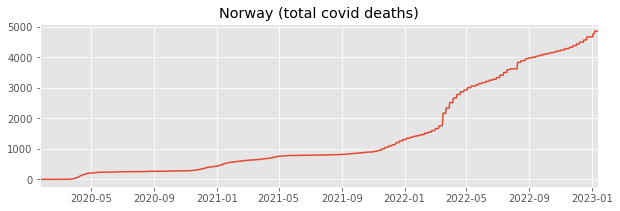

In [48]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(df_subset['date'],
        df_subset['total'])

# Set xrange
ax.set_xlim(df_subset['date'].min(), df_subset['date'].max())

# Add title
ax.set_title(country + ' (total covid deaths)')

plt.show()

Notice that the `deaths` column contains cumulative sum of the deaths over time. If we instead want the number of daily deaths, we can use `diff` to calculate the difference in the number of deaths from the day before.

In [49]:
df_subset['new'] = df_subset['total'].diff()

df_subset

,country,date,total,new
0,Norway,2020-01-22,0,NaN
1,Norway,2020-01-23,0,0.0
2,Norway,2020-01-24,0,0.0
3,Norway,2020-01-25,0,0.0
4,Norway,2020-01-26,0,0.0
...,...,...,...,...
1082,Norway,2023-01-08,4859,0.0
1083,Norway,2023-01-09,4859,0.0
1084,Norway,2023-01-10,4859,0.0
1085,Norway,2023-01-11,4859,0.0


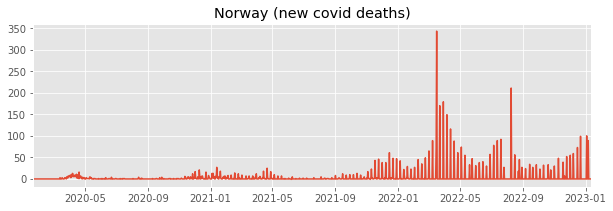

In [50]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(df_subset['date'],
        df_subset['new'])

# Set xrange
ax.set_xlim(df_subset['date'].min(), df_subset['date'].max())

# Add title
ax.set_title(country + ' (new covid deaths)')

plt.show()

The online repository is updated daily, so we can simply re-run the program everytime we want the newest numbers. 

However, let us improve our program by placing it into two functions.

1. `get_deaths` take the name of a country, and extracts the data for that country and wrangles it into a suitable format. It returns a tidy `DataFrame` containing daily time series for total and new covid deaths.

In [82]:
def get_deaths(country):
    
    # Define url
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

    # Import file from url
    df_full = pd.read_csv(url)

    # Drop columns
    df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
    
    df_full = df_full.groupby('Country/Region').sum().reset_index()


    # Extract country
    df_subset = df_full[df_full['Country/Region'] == country].copy()
    
    # Melt df from wide to long
    df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

    # Convert date to datetime
    df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

    # Rename columns
    df_subset.columns = ['country', 'date', 'total']
    
    # Calculate the difference
    df_subset['new'] = df_subset['total'].diff()

    
    return df_subset

In [77]:
# Define url
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# Import file from url
df_full = pd.read_csv(url)

# Drop columns
df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

# Extract country
df_subset = df_full[df_full['Country/Region'] == 'Denmark'].copy()

# Melt df from wide to long
df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

df_subset = df_subset.groupby(['Country/Region', 'date']).sum().reset_index()

# Convert date to datetime
df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

# Rename columns
df_subset.columns = ['country', 'date', 'total']

# Calculate the difference
df_subset['new'] = df_subset['total'].diff()

df_subset

,country,date,total,new
0,Denmark,2021-01-01,1322,NaN
1,Denmark,2022-01-01,3287,1965.0
2,Denmark,2023-01-01,7807,4520.0
3,Denmark,2021-01-10,1571,-6236.0
4,Denmark,2022-01-10,3411,1840.0
...,...,...,...,...
1082,Denmark,2021-09-08,2601,1973.0
1083,Denmark,2022-09-08,7014,4413.0
1084,Denmark,2020-09-09,628,-6386.0
1085,Denmark,2021-09-09,2606,1978.0


2. `plot_deaths` takes a `DataFrame` with the country-specific time series and a string indicating whether we want to plot total or new covid deaths. It returns a plot of total or new deaths over time.

In [52]:
def plot_deaths(ylabel, country, df):
        
    fig, ax = plt.subplots(figsize = (10, 3))

    ax.plot(df['date'],
            df[ylabel])

    # Set xrange
    ax.set_xlim(df['date'].min(), df['date'].max())

    # Add title
    ax.set_title(country + ' (' + ylabel + ' covid deaths)')

    plt.show()

We can now use the function to extract and plot covid deaths for any country in the online data file.

In [83]:
#country = 'Norway'
#country = 'Sweden'
country = 'Denmark'
df_subset = get_deaths(country)
df_subset

,country,date,total,new
0,Denmark,2020-01-22,0,NaN
1,Denmark,2020-01-23,0,0.0
2,Denmark,2020-01-24,0,0.0
3,Denmark,2020-01-25,0,0.0
4,Denmark,2020-01-26,0,0.0
...,...,...,...,...
1082,Denmark,2023-01-08,7938,0.0
1083,Denmark,2023-01-09,7980,42.0
1084,Denmark,2023-01-10,7990,10.0
1085,Denmark,2023-01-11,8009,19.0


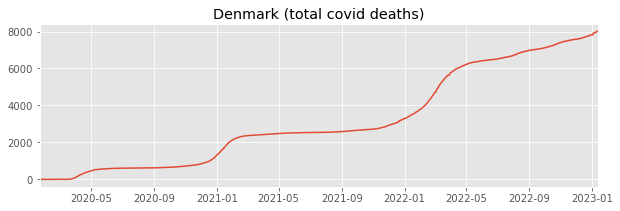

In [84]:
plot_deaths('total', 'Denmark', df_subset)

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Notice that <code>get_plot</code> returns a strange plot for some countries, e.g. Denmark. Inspect the output  of <code>get_deaths</code> and the online data set and see if you can figure out what is causing this. Fix <code>get_deaths</code> so that we get correct plots for all countries.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#

# Notice that some countries are split over multiple rows in the online data. 
# That is because they report covid deaths seperately for the different regions/states 
# in that country. We can fix our program by simply adding an additional line of 
# code in "get_data" that sums all of the deaths across the regions/state for each country.


def get_deaths(country):
    
    # Define url
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

    # Import file from url
    df_full = pd.read_csv(url)

    # Drop columns
    df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
    
    # Sum all provinces/states
    df_full = df_full.groupby('Country/Region').sum().reset_index()

    # Extract country
    df_subset = df_full[df_full['Country/Region'] == country].copy()
    
    # Melt df from wide to long
    df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

    # Convert date to datetime
    df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

    # Rename columns
    df_subset.columns = ['country', 'date', 'total']
    
    # Calculate the difference
    df_subset['new'] = df_subset['total'].diff()

    
    return df_subset


def plot_deaths(ylabel, country, df):
        
    fig, ax = plt.subplots(figsize = (10, 3))

    ax.plot(df['date'],
            df[ylabel])

    # Set xrange
    ax.set_xlim(df['date'].min(), df['date'].max())

    # Add title
    ax.set_title(country + ' (' + ylabel + ' covid deaths)')

    plt.show()
    
    
country = 'Denmark'
df_subset = get_deaths(country)
plot_deaths('new', country, df_subset)
```

</p>
</details> 

**Example: Yahoo finance**

Yahoo finance contains historical data on price and trading volume for many different stocks. Yahoo finance used to have an official API, but it was shutdown in 2017. However, we can download historical data by scraping it directly off the web site.

Let us extract the historical data for [Apple](https://finance.yahoo.com/quote/AAPL/history?p=AAPL).

We import the data directly from the URL (we get the url from right-clicking the "download" button and pressing "save as...").

In [85]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1603411200&period2=1619136000&interval=1d&events=history&includeAdjustedClose=true'
print(url)

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1603411200&period2=1619136000&interval=1d&events=history&includeAdjustedClose=true


In [86]:
apple = pd.read_csv(url)

apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-23,116.389999,116.550003,114.279999,115.040001,113.479630,82572600
1,2020-10-26,114.010002,116.550003,112.879997,115.050003,113.489487,111850700
2,2020-10-27,115.489998,117.279999,114.540001,116.599998,115.018456,92276800
3,2020-10-28,115.050003,115.430000,111.099998,111.199997,109.691704,143937800
4,2020-10-29,112.370003,116.930000,112.199997,115.320000,113.755821,146129200
...,...,...,...,...,...,...,...
119,2021-04-16,134.300003,134.669998,133.279999,134.160004,132.766724,84922400
120,2021-04-19,133.509995,135.470001,133.339996,134.839996,133.439621,94264200
121,2021-04-20,135.020004,135.529999,131.809998,133.110001,131.727600,94812300
122,2021-04-21,132.360001,133.750000,131.300003,133.500000,132.113571,68847100


Notice that the URL contains several "parameters". Let us store these parameters in variables and then concat the URL back together.

In [87]:
ticker = 'AAPL'       # ticker name
period1 = 1603411200  # start period
period2 = 1619049600  # end period

url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'
print(url)

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1603411200&period2=1619049600&interval=1d&events=history&includeAdjustedClose=true


Let us download historical data for Apple for every weekday last year. 

Notice that the time periods are measured in Unix time, i.e. the number of seconds that have elapsed since midnight on January 1, 1970. This point of reference is known as the Unix epoch. It is common for computer systems to use Unix time. 

We can convert between Unix time and a date by using the `datetime` module.

In [88]:
import datetime as dt

`datetime` has a function called `datetime` that we can use to create convert date to timestamps.

In [89]:
dt.datetime(2021, 1, 1, 23, 59)

datetime.datetime(2021, 1, 1, 23, 59)

We can then apply the function `timestamp` to convert the timestamp to the number of second between that date and the Unix Epoch.

In [90]:
dt.datetime(2022, 1, 1, 23, 59).timestamp()

1641077940.0

In [91]:
# Define periods
period1 = int(dt.datetime(2022, 1, 1, 23, 59).timestamp())
period2 = int(dt.datetime(2022, 12, 31, 23, 59).timestamp())

print(period1)
print(period2)

1641077940
1672527540


In [92]:
# Define ticker
ticker = 'AAPL'

# Define url
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'

# Import data
apple = pd.read_csv(url)

apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176544,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


Let us instead extract historical data for Amazon. The ticker for Amazon is `AMZN`.

In [93]:
# Define ticker
ticker = 'AMZN'

# Define url
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'

print(url)

https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1641077940&period2=1672527540&interval=1d&events=history&includeAdjustedClose=true


In [97]:
dt.datetime.today().timestamp()

1673598558.719116

In [94]:
# Import data
amazon = pd.read_csv(url)

amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
1,2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2,2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
3,2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
4,2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000
...,...,...,...,...,...,...,...
246,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
247,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
248,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
249,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> The file <code>closing_prices.csv</code> contains the daily closing price in 2020 for ten different companies. Import the file and create a list of the tickers. Use this list of tickers to extract the daily *opening* price for the ten companies from Yahoo finance. Store the daily opening prices in a file called <code>opening_prices.csv</code> on your computer. 
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#

# Import file
df_close = pd.read_csv('data/closing_prices.csv')

# Extract tickers
tickers = df_close['Stock'].unique()

# Define periods
period1 = int(dt.datetime(2020, 1, 1, 23, 59).timestamp())
period2 = int(dt.datetime(2020, 12, 31, 23, 59).timestamp())

# Create empty list
df_lst = []

for ticker in tickers:
    
    # Define url
    url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'
    
    # Error because Facebook have since 2020 changed name to Meta
    # Can handle the exception by using a try-except block:
        # In each iteration, we try to extract data for the given ticker,
        # but if any error occurs, we instead make a print statement.
    try:
        # Extract data
        temp_df = pd.read_csv(url)

        # Keep only open price and add stock name
        temp_df = temp_df[['Date', 'Open']].copy()
        temp_df['Stock'] = ticker

        # Append to list
        df_lst.append(temp_df)
    
    except:
        print('{}: No data'.format(ticker))
    

# Concat to single df (and reset index)
df_open = pd.concat(df_lst).reset_index(drop = True)
df_open.to_csv('data/opening_prices.csv', index = False)
```

</p>
</details> 

In [111]:
df_close = pd.read_csv('data/closing_prices.csv')

# Empty list for storing dfs
df_lst = []

# Define list of tickers
ticker_lst = df_close['Stock'].unique()

# Define periods
period1 = int(dt.datetime(2022, 1, 1, 23, 59).timestamp())
period2 = int(dt.datetime(2022, 12, 31, 23, 59).timestamp())

for ticker in ticker_lst: 
    
    print(ticker)
    url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'

    try:
        df_temp = pd.read_csv(url)
        df_lst.append(df_temp)
        
    except:
        print('URL is broken')

AAPL
AMZN
BABA
FB
URL is broken
GOOG
JNJ
JPM
MSFT
TSLA
WMT


In [112]:
len(df_lst)

9

## Scrape HTML tables

Many web sites display data in the form of HTML tables.

`pandas` has a function, `read_html`, that takes an URL as a parameter, and returns all HTML tables found on that web site as a list of `DataFrame`s.

#### Example: Wikipedia

[This](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)) Wikipedia page contains a table with countries and their estimated GDP by IMF, World Bank and United Nations. We want to scrape the information in this table of the web page.

In [113]:
# Define url
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

# Scrape web page for html tables
tables = pd.read_html(url)
print(len(tables))

7


Notice that `read_html` ended up scraping more than the one table that we are after... 

In [120]:
tables[2]

Country/Territory UN Region IMF[1][13]            World Bank[14]  \
    Country/Territory UN Region   Estimate       Year       Estimate   
0               World         —  101560901       2022       96100091   
1       United States  Americas   25035164       2022       22996100   
2               China      Asia   18321197  [n 1]2022       17734063   
3               Japan      Asia    4300621       2022        4937422   
4             Germany    Europe    4031149       2022        4223116   
..                ...       ...        ...        ...            ...   
212             Palau   Oceania        226       2022            258   
213          Kiribati   Oceania        207       2022            181   
214             Nauru   Oceania        134       2022            133   
215        Montserrat  Americas          —          —              —   
216            Tuvalu   Oceania         64       2022             63   

               United Nations[15]             
          Year           Estimate       Year  
0         2021           85328323       2020  
1         2021           20893746       2020  
2    [n 3]2021           14722801  [n 1]2020  
3         2021            5057759       2020  
4         2021            3846414       2020  
..         ...                ...        ...  
212       2020                264       2020  
213       2020                181       2020  
214       2021                135       2020  
215          —                 68       2020  
216       2021                 55       2020  

[217 rows x 8 columns]

By inspecting the page source of the url (right-click, click on "view page source", and search for "table class"), we can see that the table that we are after belongs to the table class `wikitable sortable static-row-numbers plainrowheaders srn-white-background`.

We can narrow down the number of tables being scraped by giving the parameter `attrs` a dictionary where we specify that we only want the tables that have `class` equal to a `wikitable sortable static-row-numbers plainrowheaders srn-white-background`.

In addition, we set the parameter `header` equal to `0` in order to make sure that the first row in each table is used as the column labels.

In [121]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(
    url, 
    header = 0, 
    attrs = {'class' : 'wikitable sortable static-row-numbers plainrowheaders srn-white-background'}
)

print(len(tables))

1


In [122]:
tables[0].head()

,Country/Territory,UN Region,IMF[1][13],IMF[1][13].1,World Bank[14],World Bank[14].1,United Nations[15],United Nations[15].1
0,Country/Territory,UN Region,Estimate,Year,Estimate,Year,Estimate,Year
1,World,—,101560901,2022,96100091,2021,85328323,2020
2,United States,Americas,25035164,2022,22996100,2021,20893746,2020
3,China,Asia,18321197,[n 1]2022,17734063,[n 3]2021,14722801,[n 1]2020
4,Japan,Asia,4300621,2022,4937422,2021,5057759,2020


Let us extract the GDP data from the United Nations.

In [127]:
# Extract table 
df_gdp = tables[0].copy()

# Rename and extract columns
df_gdp.rename(columns = {'Country/Territory' : 'Country', 'United Nations[15]' : 'GDP'}, inplace = True)
df_gdp = df_gdp[['Country', 'UN Region', 'GDP']].copy()

# Drop two first rows
df_gdp.drop([0,1], inplace = True)

print('Number of countries: ' + str(df_gdp['Country'].nunique()))
df_gdp.head()

Number of countries: 216


,Country,UN Region,GDP
2,United States,Americas,20893746
3,China,Asia,14722801
4,Japan,Asia,5057759
5,Germany,Europe,3846414
6,India,Asia,2664749


In [128]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 2 to 217
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    216 non-null    object
 1   UN Region  216 non-null    object
 2   GDP        216 non-null    object
dtypes: object(3)
memory usage: 6.8+ KB


In [132]:
import numpy as np

In [133]:
df_gdp['GDP'] = df_gdp['GDP'].replace('—', np.nan)


In [134]:
df_gdp['GDP'] = df_gdp['GDP'].astype(float)

In [138]:
df_gdp.groupby('UN Region').median()

,GDP
UN Region,
Africa,14029.0
Americas,14658.5
Asia,66915.0
Europe,105173.0
Oceania,772.0


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use <code>df_gdp</code> and calculate median GDP in each of the world regions as defined by the UN.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# Notice that missing in the data set is recorded with a dash. This creates a problem
# since we cannot convert from string to float when there are non-numbers in a column.

# Replace missing values with NaN
df_gdp['GDP'] = df_gdp['GDP'].replace('—', np.nan)
#print(len(df_gdp[df_gdp['GDP'].isna()]))

# Convert gdp to float
df_gdp['GDP'] = df_gdp['GDP'].astype(float)

# Calculate median GDP by region
df_gdp.groupby('UN Region')['GDP'].median()
```

</p>
</details> 

[This](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)) Wikipedia page contains information on countries and their estimated population by the United Nations.

In [ ]:
# Define url
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'

# Scrape html tables of web page
tables = pd.read_html(url)
print(len(tables))

In [ ]:
tables[0]

In [ ]:
# Extract table
df_pop = tables[0]

# Rename and extract columns
df_pop.rename(columns = {'Country / Area' : 'Country', 'Population(1 July 2019)' : 'pop'}, inplace = True)
df_pop = df_pop[['Country', 'pop']].copy()

df_pop.head()

In [ ]:
# Remove parenthesis and square brackets from country names
df_pop['Country'] = df_pop['Country'].str.split('(', expand = True)[0]
df_pop['Country'] = df_pop['Country'].str.split('[', expand = True)[0]

# Drop world
df_pop = df_pop[df_pop['Country'] != 'World'].copy()

print('Number of countries: ' + str(df_pop['Country'].nunique()))
df_pop.head()

In [ ]:
#df_pop['Country'].unique()

Merge the `DataFrame`s in order to estimate countries' GDP per capita (notice that this will only work if you have completed the previous exercise and updated `df_gdp` accordingly). 

In [ ]:
# Execute an inner join (keep only countries with both GDP and population)
df = df_gdp.merge(df_pop, on = 'Country', how = 'inner')

# Calculate GDP per capita (multiply with 1,000,000 since GDP is measured in million $)
df['GDP_pc'] = df['GDP']*1000000 / df['pop']

print('Number of countries: ' + str(df['Country'].nunique()))
df.head()

In [ ]:
#df['Country'].unique()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))

ax[0].scatter(df['GDP_pc'], df['pop'] / 1000000)
ax[0].set_ylabel('Population (in millions)')
ax[0].set_xlabel('GDP per capita (in dollars)')

ax[1].hist(df['GDP_pc'], bins = 30)
ax[1].set_ylabel('Number of countries')
ax[1].set_xlabel('GDP per capita (in dollars)')

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> <a href="https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy">This</a> Wikipedia site contains information on life expectancy for countries in the world. Notice that the site contains many different tables. Choose the table with the estimated life expectancies from United Nations (2021). 
        
Add data on life expectancy to the data set <code>df</code> that we created above. Create a scatter plot that shows GDP per capita vs life expectancy for all countries in the data, with each marker weighted by country population.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
### Tidy data ###

# Scrape tables of web page
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
tables = pd.read_html(
    url,       
    header = 0,
    attrs = {'class' : 'wikitable sortable static-row-numbers plainrowheaders srn-white-background'}
)
print(len(tables))

# Extract and rename data
df_life = tables[1].copy()
df_life.rename(columns = {'Countries and regions' : 'Country', 'Life expectancy at birth' : 'life_exp'}, inplace = True)
df_life = df_life[['Country', 'life_exp']].copy()

# Drop first row and convert to float
df_life.drop(0, axis = 0, inplace = True)
df_life['life_exp'] = df_life['life_exp'].astype(float)

# Notice that df_life contains not only countries but also regions, e.g. "Europe".
# We can drop these rows to make sure that we only have countries in the data.
# However, these rows will be automatically dropped when we merge 
# with df_gdp since that data set contains only countries.

# merge population and life expectency data (inner join)
df2 = df_life.merge(df, on = 'Country', how = 'inner')

print('Number of countries: ' + str(df2['Country'].nunique()))
df2.head()


### Plot ###

fig, ax = plt.subplots(figsize = (10, 4))
 
ax.scatter(
    df2['GDP_pc'],             # x-values
    df2['life_exp'],           # y-values
    s = df2['pop'] / 1000000   # population weights (must divide by 1000000 to make markers visible)    
)

ax.set_ylabel('Life expectancy (in yrs)')
ax.set_xlabel('GDP per capita (in dollars)')

ax.set_title('Life expectency vs GDP per capita, United Nations')

plt.show()
```

</p>
</details> 

### Summary

`pandas` is super useful for web scraping! As you have seen, we have scraped many different web sites using just `pandas`.

However, there are some limitations to what we can use `pandas` for:
- `read_csv` can only be used to extract data that is in the form of csv files.
- `read_html` can only be used to extract data that is in the form of HTML tables. 

If you want to extract data from a web site that is not in the form of a csv file or HTML table, you need to use something more powerful, e.g. `requests` and `BeautifulSoup`. See e.g. [this](https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/) or [this](https://betterprogramming.pub/how-to-use-pandas-for-web-scraping-not-enough-try-beautiful-soup-98d0362d5bb1) tutorial for how to use these packages to scrape additional HTML data.